In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('Heart2.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BP Meds              4240 non-null   float64
 1   prevalentStroke      4240 non-null   float64
 2   prevalentHyp         4240 non-null   float64
 3   diabetes             4240 non-null   float64
 4   high_risk_age_group  4240 non-null   int64  
 5   bmi_risk             4240 non-null   int64  
 6   smoking_riskkk       4240 non-null   int64  
 7   cholesterol_risk     4240 non-null   int64  
 8   gender_risk          4240 non-null   int64  
 9   Heartrate_risk       4240 non-null   int64  
 10  Diastolic_BP_risk    4240 non-null   int64  
 11  Systolic_BP_risk     4240 non-null   int64  
 12  Glucose_risk         4240 non-null   int64  
 13  education_new        4240 non-null   float64
 14  Heart-Att            4240 non-null   int64  
dtypes: float64(5), int64(10)
memory usage:

In [553]:
x=df.drop(['Heart-Att'],axis=1)

In [7]:
for col in x.columns:
    print(pd.crosstab(df[col],df['Heart-Att'],normalize='index'))

Heart-Att         0         1
BP Meds                      
0.0        0.855605  0.144395
1.0        0.649351  0.350649
Heart-Att               0         1
prevalentStroke                    
0.0              0.850629  0.149371
1.0              0.482759  0.517241
Heart-Att            0         1
prevalentHyp                    
0.0           0.890561  0.109439
1.0           0.753799  0.246201
Heart-Att         0         1
diabetes                     
0.0        0.853788  0.146212
1.0        0.633028  0.366972
Heart-Att                   0         1
high_risk_age_group                    
0                    0.958633  0.041367
1                    0.899519  0.100481
2                    0.802701  0.197299
3                    0.722787  0.277213
Heart-Att         0         1
bmi_risk                     
0          0.874203  0.125797
1          0.827189  0.172811
2          0.789744  0.210256
Heart-Att              0         1
smoking_riskkk                    
0               0.861597

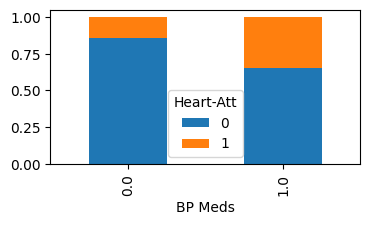

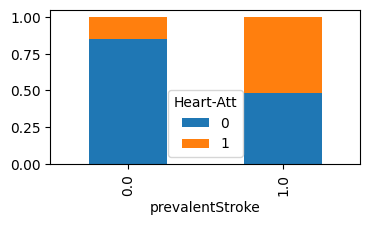

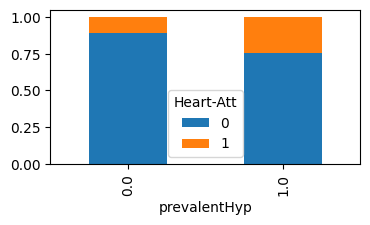

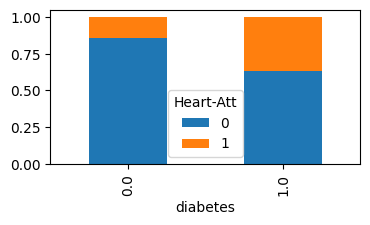

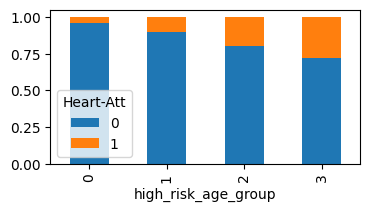

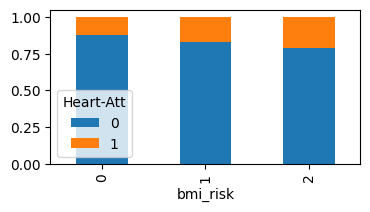

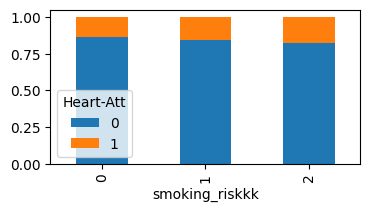

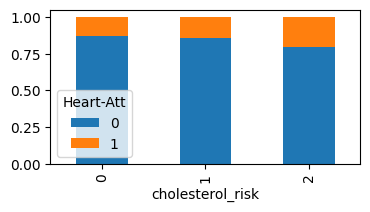

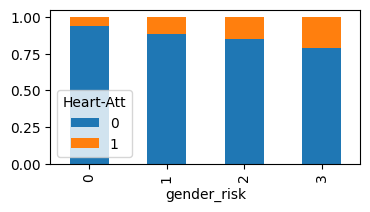

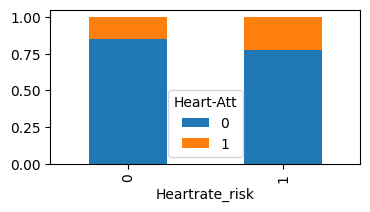

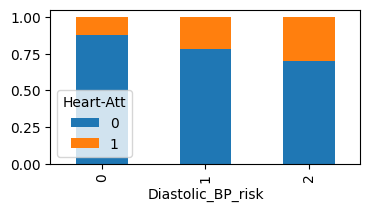

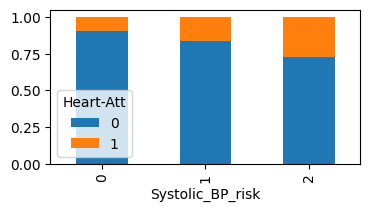

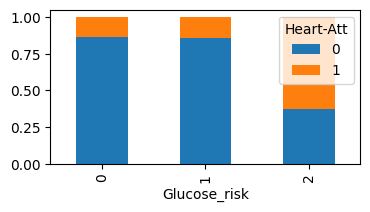

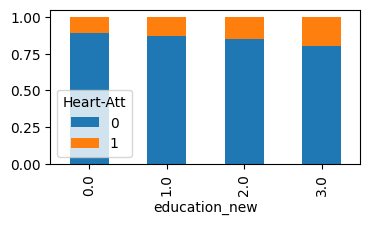

In [8]:
for col in x.columns:
    ct=(pd.crosstab(df[col],df['Heart-Att'],normalize='index'))
    ct.plot(kind='bar',stacked=True,figsize=(4,2))
    

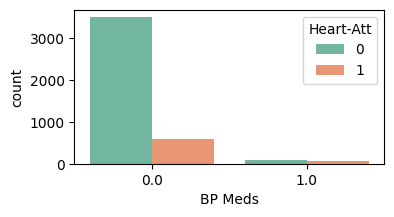

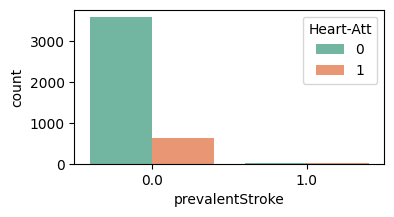

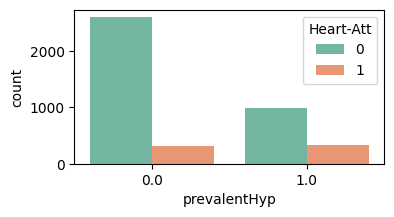

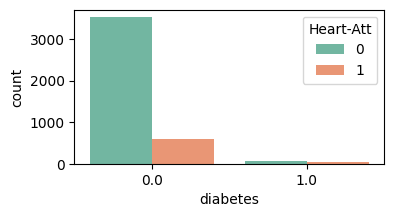

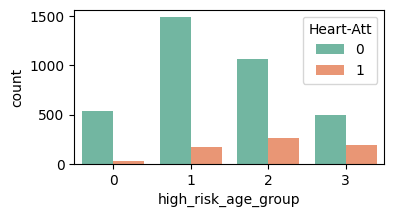

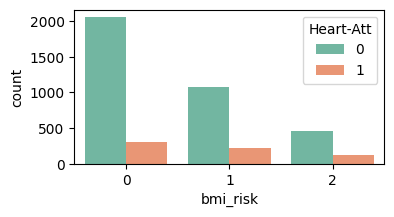

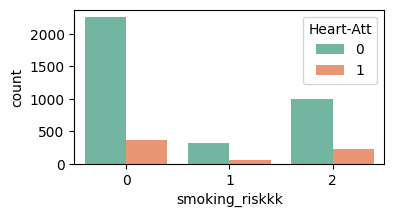

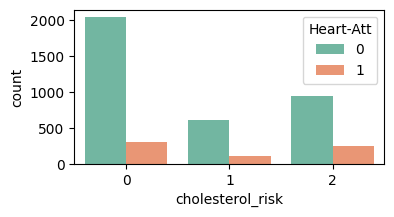

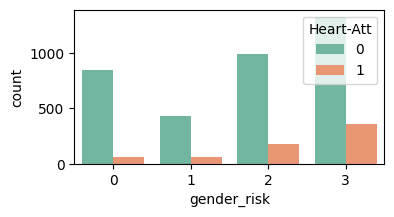

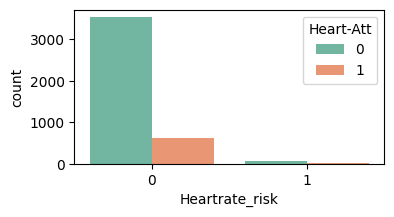

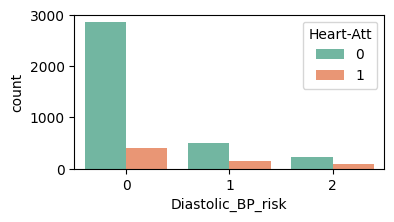

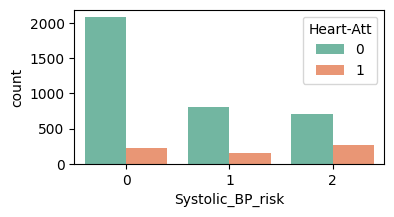

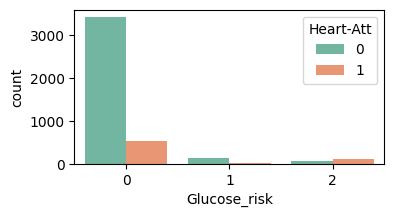

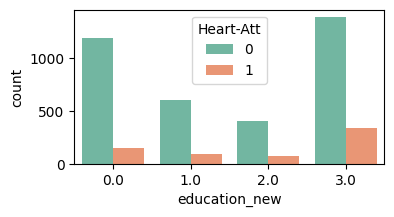

In [9]:
for col in x.columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=df,x=col,hue='Heart-Att',palette='Set2')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=df['Heart-Att']

In [554]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [555]:
xtrain.shape

(2968, 14)

In [14]:
ytrain.shape

(2968,)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [471]:
RF=RandomForestClassifier(oob_score=True,random_state=42)

In [66]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       oob_score=True, random_state=42)

In [67]:
RF.score(xtrain,ytrain)

0.9157681940700808

In [68]:
RF.score(xtest,ytest)

0.7948113207547169

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [69]:
ytrain_predict=RF.predict(xtrain)
ytest_predict=RF.predict(xtest)

In [70]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2519
           1       0.67      0.86      0.76       449

    accuracy                           0.92      2968
   macro avg       0.82      0.89      0.85      2968
weighted avg       0.93      0.92      0.92      2968



In [71]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1077
           1       0.29      0.24      0.26       195

    accuracy                           0.79      1272
   macro avg       0.58      0.57      0.57      1272
weighted avg       0.78      0.79      0.79      1272



In [26]:
pd.DataFrame(RF.feature_importances_,columns=['Important_features'],index=x.columns).sort_values(by='Important_features',ascending=False)

,Important_features
education_new,0.130517
high_risk_age_group,0.128111
cholesterol_risk,0.114786
bmi_risk,0.102232
Glucose_risk,0.089338
smoking_riskkk,0.083199
Systolic_BP_risk,0.081203
Diastolic_BP_risk,0.078932
gender_risk,0.074052
prevalentHyp,0.040486


In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [42]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)


In [43]:
brf.fit(xtrain,ytrain)

BalancedRandomForestClassifier(random_state=42)

In [47]:
ytrain_predict=brf.predict(xtrain)
ytest_predict=brf.predict(xtest)

In [48]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      2519
           1       0.45      0.94      0.61       449

    accuracy                           0.82      2968
   macro avg       0.72      0.87      0.74      2968
weighted avg       0.90      0.82      0.84      2968



In [49]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1077
           1       0.28      0.54      0.37       195

    accuracy                           0.71      1272
   macro avg       0.59      0.64      0.59      1272
weighted avg       0.80      0.71      0.75      1272



In [530]:
from xgboost import XGBClassifier

In [73]:
from collections import Counter

In [531]:
counter=Counter(ytrain)
scale=counter[0]/counter[1]

In [532]:
print(scale)

5.610244988864142


In [533]:
grid= {
    'n_estimators': [300, 500],
    'max_depth': [6,5,7],
    'learning_rate': [1,0.1, 0.001],
    'subsample': [0.8, 1,1.5],
    'scale_pos_weight': [scale*1.5,scale]  
    
}

In [ ]:
gridsearch = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                    param_grid=grid, scoring=scorer, cv=10)

In [584]:
xgb=XGBClassifier( n_estimators=300,
    max_depth=20,
    random_state=42,scale_pos_weight=3,booster='gbtree',learning_rate=0.8,
                  gamma=0,min_child_weight=1,colsample_bytree=1,colsample_bylevel=1,grow_policy='depthwise')

In [585]:

xgb.fit(xtrain,ytrain)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [587]:
ytrain_predict=xgb.predict(xtrain)
ytest_predict=xgb.predict(xtest)

In [588]:
print(classification_report(ytrain,ytrain_predict))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2519
           1       0.69      0.86      0.77       449

    accuracy                           0.92      2968
   macro avg       0.83      0.90      0.86      2968
weighted avg       0.93      0.92      0.92      2968



In [589]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1077
           1       0.32      0.32      0.32       195

    accuracy                           0.79      1272
   macro avg       0.60      0.60      0.60      1272
weighted avg       0.79      0.79      0.79      1272



In [590]:
y_proba = xgb.predict_proba(xtest)[:, 1]

In [601]:
y_pred = (y_proba >= 0.05).astype(int)

In [602]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1077
           1       0.20      0.48      0.28       195

    accuracy                           0.62      1272
   macro avg       0.54      0.57      0.51      1272
weighted avg       0.77      0.62      0.68      1272



In [524]:
import shap

 99%|===================| 1260/1272 [01:39<00:00]        

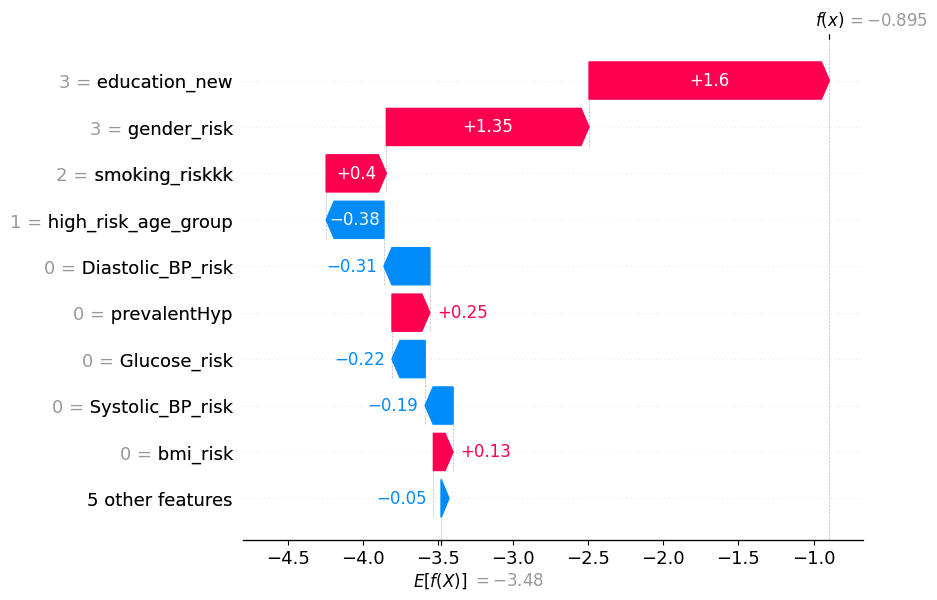

In [525]:
explainer = shap.Explainer(xgb, xtrain)
shap_values = explainer(xtest)
shap.plots.waterfall(shap_values[1])


 99%|===================| 1264/1272 [01:39<00:00]        

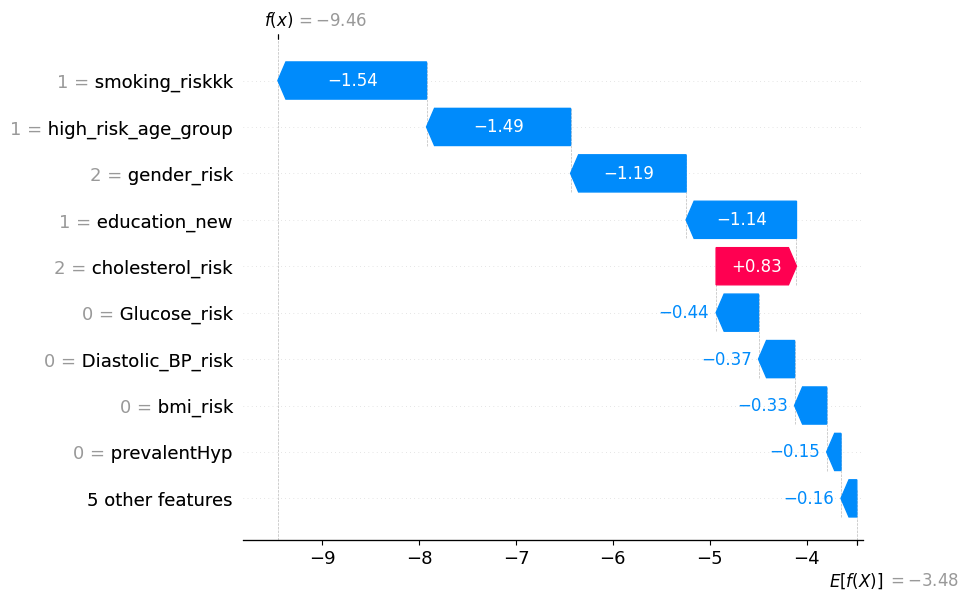

In [526]:
explainer = shap.Explainer(xgb, xtrain)
shap_values = explainer(xtest)
shap.plots.waterfall(shap_values[0])

In [ ]:
#booster gblinear is used for equal weight to test and train 

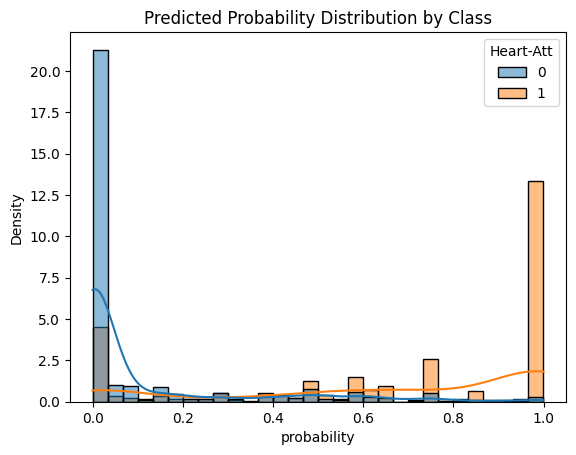

In [454]:
probs = xgb.predict_proba(x)[:, 1]

# 2. Combine probs and true labels into a DataFrame
df_plot = pd.DataFrame({
    'probability': probs,
    'Heart-Att': y
})

# 3. Plot using seaborn
sns.histplot(data=df_plot, x='probability', hue='Heart-Att', bins=30, kde=True, stat="density", common_norm=False)
plt.title("Predicted Probability Distribution by Class")
plt.show()

In [455]:
df['Heart-Att'].value_counts()


Heart-Att
0    3596
1     644
Name: count, dtype: int64

In [456]:
from imblearn.over_sampling import ADASYN


In [566]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(xtrain, ytrain)


In [567]:
xgb=XGBClassifier( 
    random_state=42)

In [568]:
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [570]:
ytrain_predict=xgb.predict(X_resampled)
ytest_predict=xgb.predict(xtest)

In [571]:
print(classification_report(y_resampled,ytrain_predict))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2519
           1       0.88      0.85      0.87      2533

    accuracy                           0.87      5052
   macro avg       0.87      0.87      0.87      5052
weighted avg       0.87      0.87      0.87      5052



In [572]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1077
           1       0.25      0.30      0.28       195

    accuracy                           0.76      1272
   macro avg       0.56      0.57      0.56      1272
weighted avg       0.77      0.76      0.76      1272



In [469]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(xtrain, ytrain)


In [475]:
RF.fit(X_resampled,y_resampled)

RandomForestClassifier(oob_score=True, random_state=42)

In [477]:
ytrain_predict=RF.predict(xtrain)
ytest_predict=RF.predict(xtest)

In [478]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2519
           1       0.59      0.85      0.69       449

    accuracy                           0.89      2968
   macro avg       0.78      0.87      0.81      2968
weighted avg       0.91      0.89      0.89      2968



In [479]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1077
           1       0.25      0.32      0.28       195

    accuracy                           0.75      1272
   macro avg       0.56      0.57      0.56      1272
weighted avg       0.78      0.75      0.76      1272



In [492]:
scale_pos_weight = len(ytrain[ytrain == 0]) / len(ytrain[ytrain == 1])


In [493]:
scale_pos_weight

5.610244988864142

In [495]:
from imblearn.ensemble import EasyEnsembleClassifier


In [496]:
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)
eec.fit(xtrain, ytrain)

EasyEnsembleClassifier(random_state=42)

In [497]:
ytrain_predict=eec.predict(xtrain)
ytest_predict=eec.predict(xtest)

In [498]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      2519
           1       0.29      0.68      0.40       449

    accuracy                           0.70      2968
   macro avg       0.61      0.69      0.60      2968
weighted avg       0.83      0.70      0.74      2968



In [499]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1077
           1       0.27      0.61      0.38       195

    accuracy                           0.69      1272
   macro avg       0.59      0.66      0.59      1272
weighted avg       0.81      0.69      0.73      1272



In [515]:
y_probs = eec.predict_proba(xtest)[:, 1] 
y_pred_thresh = (y_probs >= 0.4).astype(int)

In [516]:
print(classification_report(ytest,y_pred_thresh))

              precision    recall  f1-score   support

           0       0.94      0.36      0.52      1077
           1       0.20      0.88      0.33       195

    accuracy                           0.44      1272
   macro avg       0.57      0.62      0.42      1272
weighted avg       0.83      0.44      0.49      1272



In [577]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(xtrain,ytrain)

mod=XGBClassifier( n_estimators=500, scale_pos_weight=1.5, random_state=42,booster='gblinear')

mod.fit(X_res,y_res)


XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [578]:
ytrain_predict=mod.predict(X_res)
ytest_predict=mod.predict(xtest)

In [579]:
print(classification_report(y_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59      2519
           1       0.62      0.81      0.70      2519

    accuracy                           0.65      5038
   macro avg       0.67      0.65      0.64      5038
weighted avg       0.67      0.65      0.64      5038



In [580]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66      1077
           1       0.22      0.77      0.34       195

    accuracy                           0.55      1272
   macro avg       0.57      0.64      0.50      1272
weighted avg       0.82      0.55      0.61      1272



In [603]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(200,), activation='relu')
mlp.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(200,))

In [604]:
ytrain_predict=mlp.predict(xtrain)
ytest_predict=mlp.predict(xtest)

In [605]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2519
           1       0.79      0.26      0.39       449

    accuracy                           0.88      2968
   macro avg       0.84      0.62      0.66      2968
weighted avg       0.87      0.88      0.85      2968



In [606]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1077
           1       0.59      0.15      0.24       195

    accuracy                           0.85      1272
   macro avg       0.73      0.57      0.58      1272
weighted avg       0.82      0.85      0.82      1272

